## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import airportsdata

In [2]:
flights = pd.read_csv('midterm.csv')
flights.head()

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,0,2018-01-01,UA,UA_CODESHARE,UA,3501,YX,N744YX,3501,12953,...,733.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2018-01-01,UA,UA_CODESHARE,UA,3502,YX,N640RW,3502,11433,...,1075.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2018-01-01,UA,UA_CODESHARE,UA,3503,YX,N641RW,3503,11618,...,488.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN
3,3,2018-01-01,UA,UA_CODESHARE,UA,3504,YX,N722YX,3504,11618,...,199.0,12.0,0.0,20.0,0.0,0.0,NaN,NaN,NaN,NaN
4,4,2018-01-01,UA,UA_CODESHARE,UA,3505,YX,N855RW,3505,12266,...,224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# viewing info
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165072 entries, 0 to 165071
Data columns (total 43 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           165072 non-null  int64  
 1   fl_date              165072 non-null  object 
 2   mkt_unique_carrier   165072 non-null  object 
 3   branded_code_share   165072 non-null  object 
 4   mkt_carrier          165072 non-null  object 
 5   mkt_carrier_fl_num   165072 non-null  int64  
 6   op_unique_carrier    165072 non-null  object 
 7   tail_num             164593 non-null  object 
 8   op_carrier_fl_num    165072 non-null  int64  
 9   origin_airport_id    165072 non-null  int64  
 10  origin               165072 non-null  object 
 11  origin_city_name     165072 non-null  object 
 12  dest_airport_id      165072 non-null  int64  
 13  dest                 165072 non-null  object 
 14  dest_city_name       165072 non-null  object 
 15  crs_dep_time     

In [4]:
# viewing descriptives of target
flights['arr_delay'].describe()

count    162002.000000
mean          5.189689
std          48.634558
min         -90.000000
25%         -15.000000
50%          -6.000000
75%           7.000000
max        1596.000000
Name: arr_delay, dtype: float64

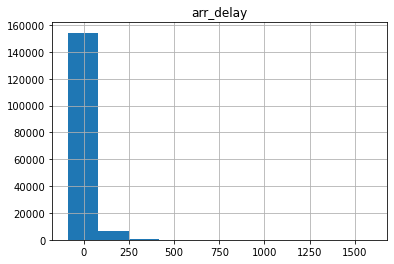

In [5]:
# checking distribution of target variable (arrival delay)
hist = flights.hist(column='arr_delay')

In [6]:
# total arrivals
arrivals = flights['arr_delay'].count()
arrivals

162002

In [7]:
# checking proportion of flights delayed
delay = flights['arr_delay'][flights['arr_delay'] > 0].count()
delay

56293

In [8]:
# checking early flights
early = flights['arr_delay'][flights['arr_delay'] < 0].count()
early

102603

In [9]:
# on time
on_time = flights['arr_delay'][flights['arr_delay'] == 0].count()
on_time

3106

In [10]:
# percentages of overall
print('Delayed: ', round(delay/arrivals * 100, 2), '%')
print('Early: ', round(early/arrivals * 100, 2), '%')
print('On Time: ', round(on_time/arrivals * 100, 2), '%')

Delayed:  34.75 %
Early:  63.33 %
On Time:  1.92 %


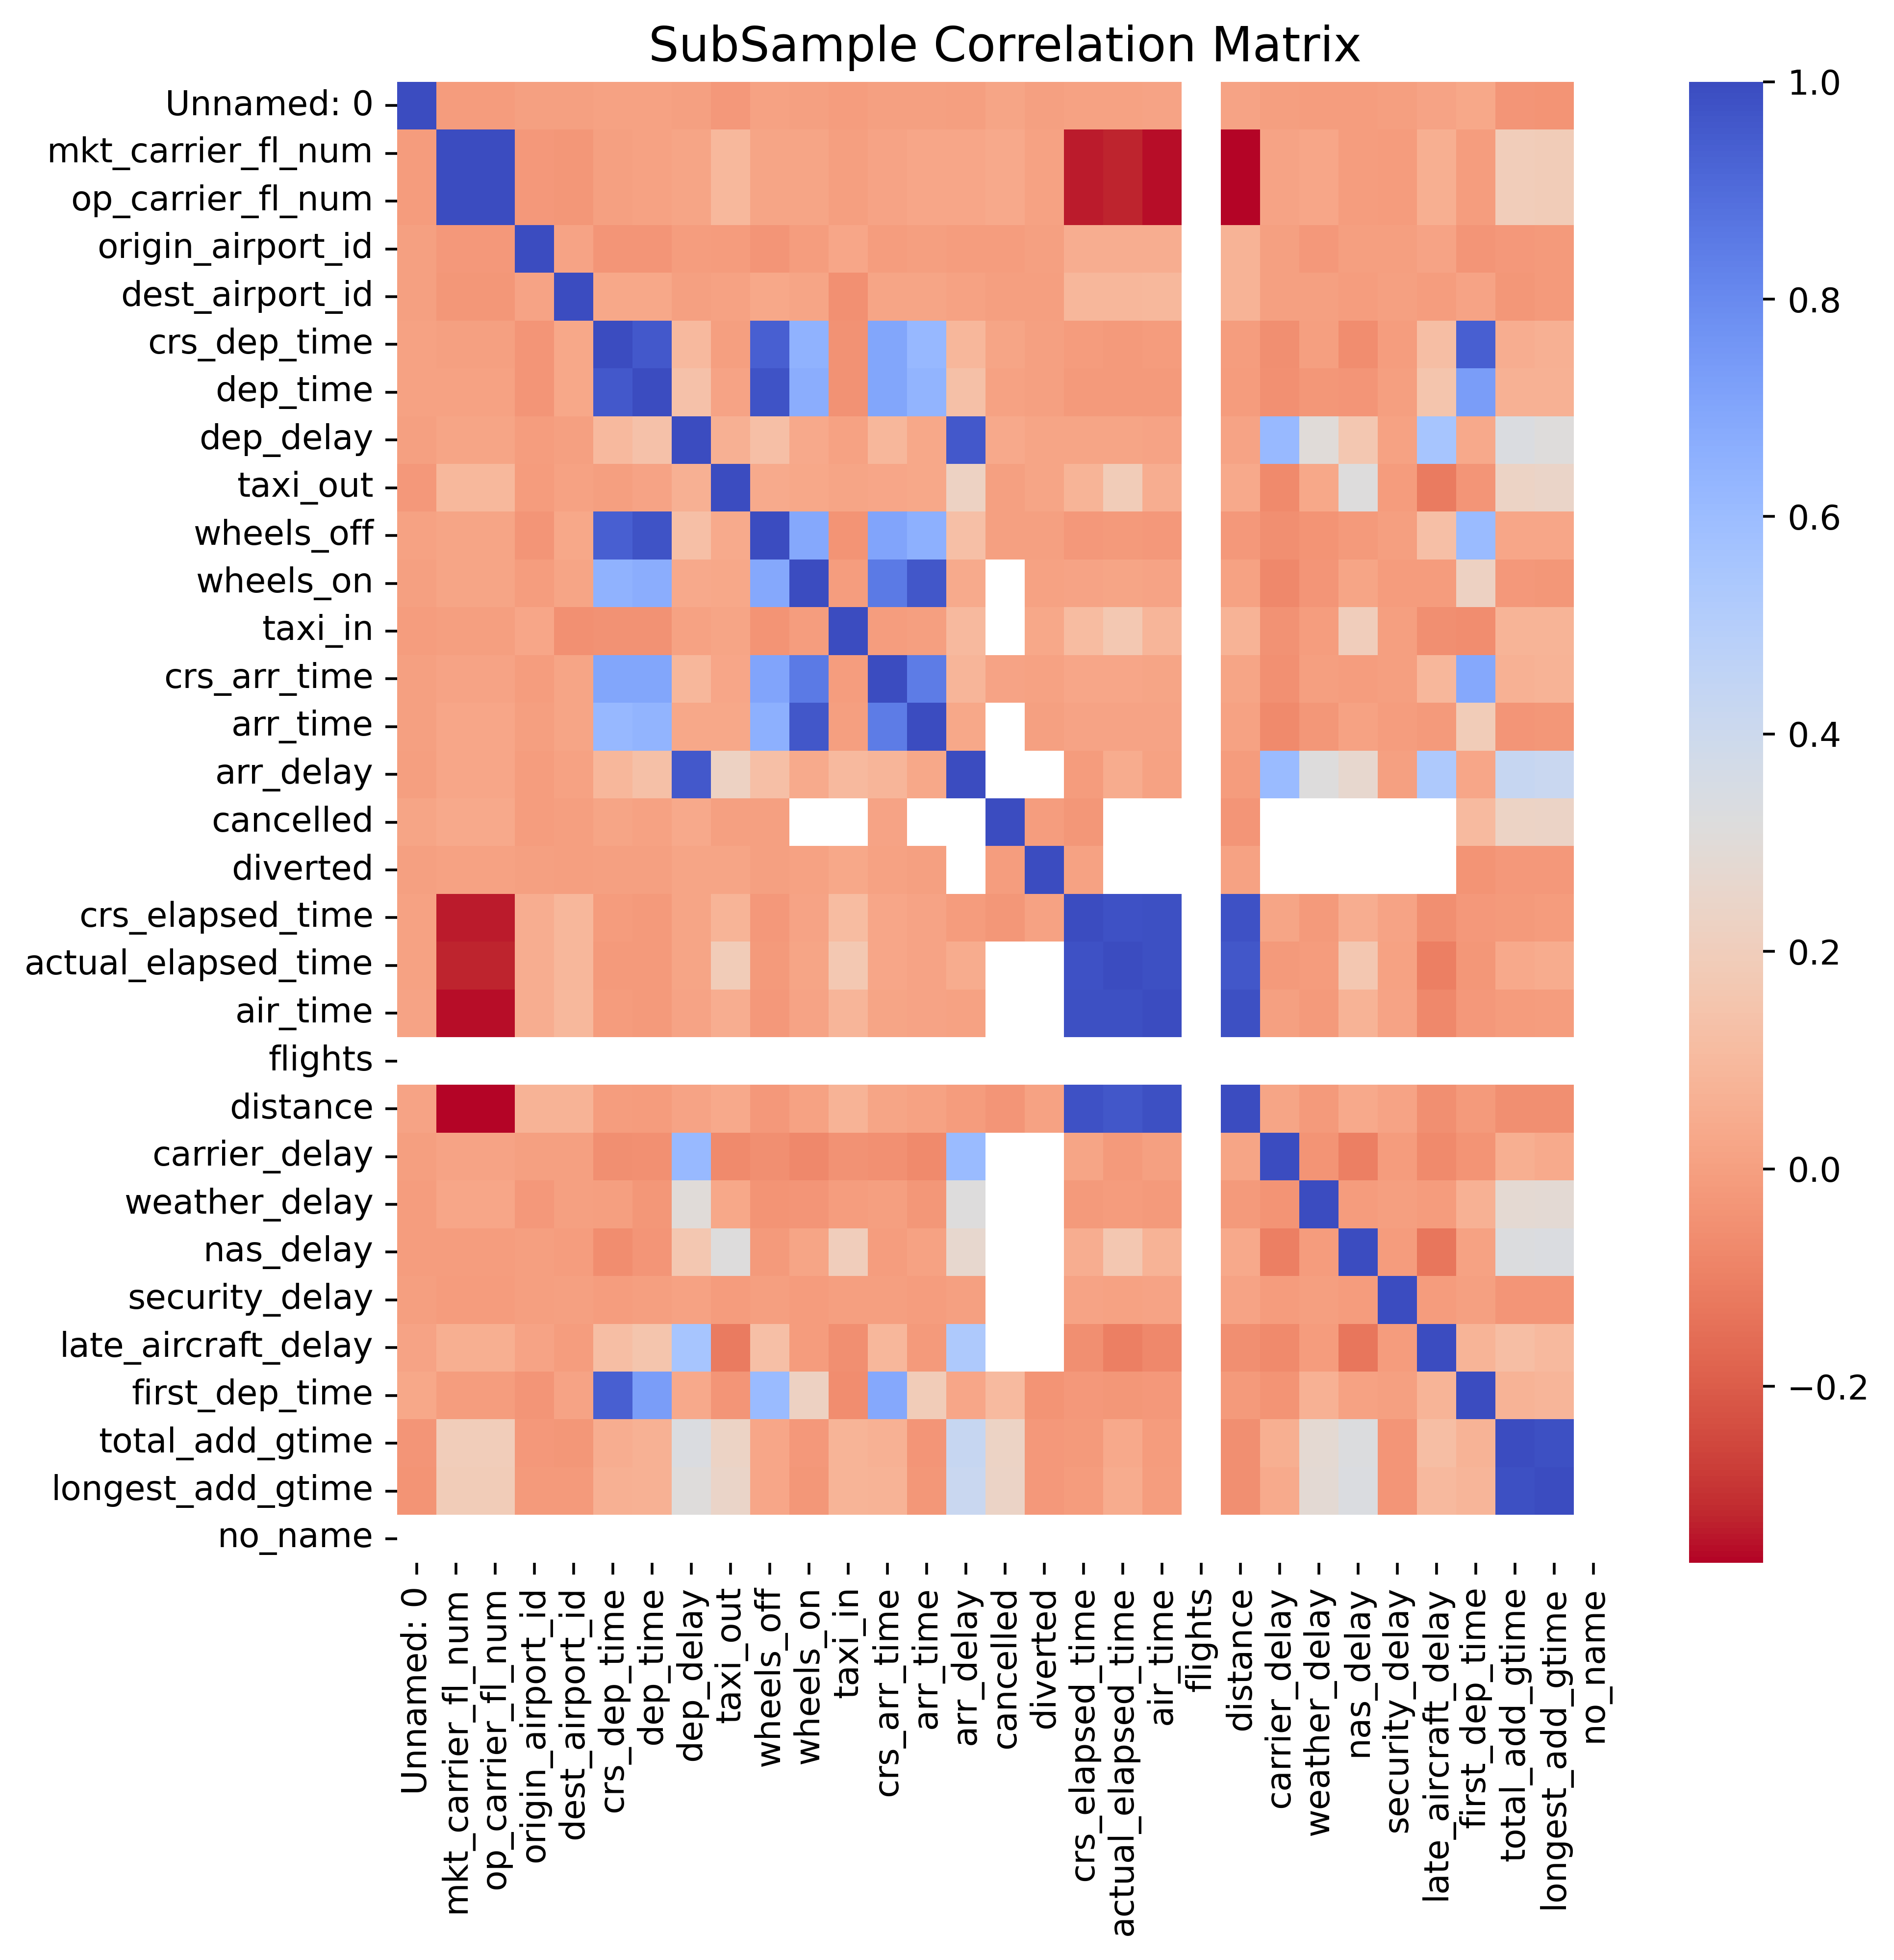

In [25]:
# checking for correlation/feature impact visually
f, ax = plt.subplots(figsize=(8,8), dpi=500)
# plotting subsample
sample_corr = flights.corr()
sns.heatmap(sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
ax.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

In [70]:
# dropping irrelevant/duplicate/large % missing info columns
# mkt_carrier, tail_num, mkt_carrier_fl_num, op_carrier_fl_num,
# origin_airport_id, origin_city_name, dest_airport_id, dest_city_name,
# dep_time, wheels_off, wheels_on, arr_time, cancellation_code, nas_delay
# security_delay, weather_delay, first_dep_time, longest_add_gtime, no_name
to_drop = ['Unnamed: 0',
     'mkt_carrier', 
     'tail_num', 
     'mkt_carrier_fl_num', 
     'op_carrier_fl_num',
     'origin_airport_id', 
     'origin_city_name', 
     'dest_airport_id', 
     'dest_city_name',
     'dep_time', 
     'wheels_off', 
     'wheels_on', 
     'arr_time', 
     'cancellation_code', 
     'nas_delay',
     'security_delay', 
     'weather_delay', 
     'first_dep_time', 
     'longest_add_gtime', 
     'no_name']


flights_filtered = flights.drop(to_drop, axis=1)
flights_filtered.head()   

,fl_date,mkt_unique_carrier,branded_code_share,op_unique_carrier,origin,dest,crs_dep_time,dep_delay,taxi_out,taxi_in,...,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,late_aircraft_delay,total_add_gtime
0,2018-01-01,UA,UA_CODESHARE,YX,LGA,ORD,1300,-4.0,15.0,13.0,...,0.0,N,164.0,140.0,112.0,1.0,733.0,NaN,NaN,NaN
1,2018-01-01,UA,UA_CODESHARE,YX,DTW,IAH,630,3.0,18.0,8.0,...,0.0,N,204.0,202.0,176.0,1.0,1075.0,NaN,NaN,NaN
2,2018-01-01,UA,UA_CODESHARE,YX,EWR,DTW,1500,28.0,28.0,8.0,...,0.0,N,129.0,119.0,83.0,1.0,488.0,0.0,18.0,NaN
3,2018-01-01,UA,UA_CODESHARE,YX,EWR,DCA,2041,12.0,50.0,6.0,...,0.0,N,78.0,98.0,42.0,1.0,199.0,12.0,0.0,NaN
4,2018-01-01,UA,UA_CODESHARE,YX,IAH,DFW,2140,-3.0,15.0,17.0,...,0.0,N,77.0,79.0,47.0,1.0,224.0,NaN,NaN,NaN


In [71]:
# filling nans in _delay columns with 0 as they signify no delay
flights_filtered[['carrier_delay','late_aircraft_delay','total_add_gtime']] = flights_filtered[['carrier_delay','late_aircraft_delay','total_add_gtime']].fillna(0)

In [72]:
# rechecking for missing values
flights_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165072 entries, 0 to 165071
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   fl_date              165072 non-null  datetime64[ns]
 1   mkt_unique_carrier   165072 non-null  object        
 2   branded_code_share   165072 non-null  object        
 3   op_unique_carrier    165072 non-null  object        
 4   origin               165072 non-null  object        
 5   dest                 165072 non-null  object        
 6   crs_dep_time         165072 non-null  int64         
 7   dep_delay            162544 non-null  float64       
 8   taxi_out             162480 non-null  float64       
 9   taxi_in              162379 non-null  float64       
 10  crs_arr_time         165072 non-null  int64         
 11  arr_delay            162002 non-null  float64       
 12  cancelled            165072 non-null  float64       
 13  diverted      

In [73]:
# removing remaining rows with no data
flights_filtered = flights_filtered.dropna()
flights_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161896 entries, 0 to 165071
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   fl_date              161896 non-null  datetime64[ns]
 1   mkt_unique_carrier   161896 non-null  object        
 2   branded_code_share   161896 non-null  object        
 3   op_unique_carrier    161896 non-null  object        
 4   origin               161896 non-null  object        
 5   dest                 161896 non-null  object        
 6   crs_dep_time         161896 non-null  int64         
 7   dep_delay            161896 non-null  float64       
 8   taxi_out             161896 non-null  float64       
 9   taxi_in              161896 non-null  float64       
 10  crs_arr_time         161896 non-null  int64         
 11  arr_delay            161896 non-null  float64       
 12  cancelled            161896 non-null  float64       
 13  diverted      

In [ ]:
# imprting category encoders
#import category_encoders as ce

# encoding categorical variables with ordinal encoding
#encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

#X_train = encoder.fit_transform(X_train)

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [ ]:
# testing for normal (Gaussian) distribution with scipy.stats
# outliers not yet removed
from scipy.stats import shapiro
data = flights['arr_delay'].dropna()
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

#### Removing outliers

Outliers are being classified by the Q1/Q3 -/+ 1.5*IQR strategy:
- IQR = 22
- Q1 = -15
- Q3 = 7
- Upper Bound = 39
- Lower Bound = -37

In [ ]:
# removing outliers
# filters
f1 = (flights['arr_delay'] >= -37)
f2 = (flights['arr_delay'] <= 39)
a = flights['arr_delay'][f1 & f2].dropna()

# running again
from scipy.stats import shapiro
data = a
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

In [ ]:
# validating mean = 0
if a.mean() == 0:
    print(True)
else:
    print(False, 'Mean =', a.mean())

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [ ]:
# checking dtype of flight dates column
flights['fl_date'].dtype

In [13]:
# converting to datetime obj
flights['fl_date'] = pd.to_datetime(flights['fl_date'], format='%Y-%m-%d')

# checking type
flights['fl_date'].dtype

dtype('<M8[ns]')

In [14]:
# checking number of flights in each month
flights.groupby(flights['fl_date'].dt.strftime('%B'))['fl_date'].count()

fl_date
April        14732
August       15126
December     13610
February     11569
January      13320
July         15010
June         13256
March        14268
May          13267
November     13471
October      13992
September    13451
Name: fl_date, dtype: int64

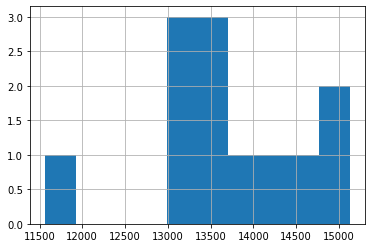

In [63]:
# viewing distribution of flight volumes per month
hist = flights.groupby(flights['fl_date'].dt.strftime('%B'))['fl_date'].count().hist()

In [62]:
# grouping delays by monthly average
flights.groupby(flights['fl_date'].dt.strftime('%B'))['arr_delay'].mean().sort_values()

fl_date
September    2.043949
October      2.279444
January      2.722188
April        3.381966
November     3.479309
March        3.901231
December     4.021218
February     5.976374
May          6.636105
June         8.794033
August       9.218190
July         9.492960
Name: arr_delay, dtype: float64

#### Why is average delay distributed this way across the higher scoring months?

- **May/June/July/August:** These account for the largest average delays, most likely due to the American school year running from Sept. through May, making the summer months (encompassed here) the largest travel time for students/families. North American summer season is also big for international tourism.

- **December:** Middle of the pack in terms of delays. These could be due to the holidays, and also the weather in many states during this time of year (snow/storms).

- **February/March/April:** Have grouped these months together as Spring Break for American colleges take place in late Feb/March and early April which could attract a spike in flight volumes and therefore a higher prevalence of delays.

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [162]:
# getting dates/origin for flights with recorded weather delays
weather_delays = flights[['fl_date','origin','weather_delay']][flights['weather_delay'] > 0]
ports = list(weather_delays['origin'])
dates = list(weather_delays['fl_date'].dt.strftime('%Y-%m-%d'))

In [83]:
# setting up airports package
airports = airportsdata.load('IATA')
# list to hold location data
locs = []
# creating function to grab lat/long for airports
def get_loc(code):
    '''
    get latitude/longitude for airport given IATA code
    returns list with lat/long as tuple
    
    code = IATA code(s) as string or list of strings
    '''
    
    for i in code:
        try:
            x = airports[i]['lat']
            y = airports[i]['lon']
            loc = f'{x},{y}'
            locs.append(loc)
        except KeyError:
            locs.append(i)
    return locs

In [84]:
# running function
get_loc(ports)

['41.97859955,-87.90480042',
 '41.97859955,-87.90480042',
 '36.2818984985,-94.3068008423',
 '38.0364990234,-84.6059036255',
 '41.97859955,-87.90480042',
 '32.8968009949,-97.0380020142',
 '42.2123985291,-83.3534011841',
 '41.97859955,-87.90480042',
 '21.3187007904,-157.9219970703',
 '33.6366996765,-84.4281005859',
 '30.1944999695,-97.6698989868',
 '40.9160995483,-81.442199707',
 '32.12760162,-81.20210266',
 '42.36429977,-71.00520325',
 '40.49150085,-80.23290253',
 '40.63980103,-73.77890015',
 '40.63980103,-73.77890015',
 '40.63980103,-73.77890015',
 '40.63980103,-73.77890015',
 '40.63980103,-73.77890015',
 '40.77719879,-73.87259674',
 '40.63980103,-73.77890015',
 '40.63980103,-73.77890015',
 '43.1111984253,-76.106300354',
 '41.97859955,-87.90480042',
 '41.97859955,-87.90480042',
 '38.8521003723,-77.0376968384',
 '41.97859955,-87.90480042',
 '36.2818984985,-94.3068008423',
 '44.04529953,-103.0569992065',
 '30.20529938,-91.98760223',
 '41.97859955,-87.90480042',
 '41.97859955,-87.90480042

In [150]:
# setting up API call
import requests as re
import os
from IPython.display import JSON

# declaring api key + base url
api_key = os.environ['WEATHER_API_KEY']
url = 'http://api.worldweatheronline.com/premium/v1/past-weather.ashx'

# test request
params = {'q': locs[0].strip("'"),
          'date': dates[0].strip("'"),
          'format': 'json',
          'key': api_key}
res = re.get(url, params=params)
JSON(res.json())

<IPython.core.display.JSON object>

In [152]:
# finding weather desc. for the day
result = res.json()
result['data']['weather'][0]['hourly'][0]['weatherDesc'][0]['value']

'Clear'

In [155]:
# creating empty list for storing results
results = []

# creating function 
def get_weather(date, location):
    '''
    get weather from API for given lists of dates and locations
    
    date = list of dates in yyyy-mm-dd format
    locations = list of latitude, longitude in decimal format
    '''
    for i in range(len(date)):
        params = {'q': locs[i].strip("'"),
        'date': dates[i].strip("'"),
        'format': 'json',
        'key': api_key}
        res = re.get(url, params=params)
        result = res.json()
        weather = result['data']['weather'][0]['hourly'][0]['weatherDesc'][0]['value']
        results.append(weather)

In [156]:
# running function
get_weather(dates, locs)

In [158]:
# checking results
results

['Clear',
 'Clear',
 'Clear',
 'Overcast',
 'Clear',
 'Clear',
 'Clear',
 'Partly cloudy',
 'Clear',
 'Clear',
 'Clear',
 'Light snow',
 'Clear',
 'Heavy snow',
 'Overcast',
 'Partly cloudy',
 'Partly cloudy',
 'Partly cloudy',
 'Partly cloudy',
 'Patchy moderate snow',
 'Clear',
 'Patchy moderate snow',
 'Patchy moderate snow',
 'Patchy moderate snow',
 'Cloudy',
 'Cloudy',
 'Clear',
 'Cloudy',
 'Clear',
 'Light rain',
 'Partly cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Clear',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Patchy sleet possible',
 'Clear',
 'Mist',
 'Mist',
 'Fog',
 'Fog',
 'Moderate rain',
 'Overcast',
 'Heavy snow',
 'Ice pellets',
 'Clear',
 'Partly cloudy',
 'Overcast',
 'Overcast',
 'Partly cloudy',
 'Heavy snow',
 'Heavy snow',
 'Clear',
 'Heavy snow',
 'Clear',
 'Heavy snow',
 'Blizzard',
 'Heavy snow',
 'Heavy snow',
 'Heavy snow',
 'Heavy snow',
 'Heavy snow',
 'Heavy snow',
 'Heavy snow',
 'Heavy snow',
 'Heavy snow',
 'Heavy snow',
 '

In [163]:
# adding to dataframe
weather_delays['weather'] = results

# viewing
weather_delays.head(10)

,fl_date,origin,weather_delay,weather
17,2018-01-01,ORD,87.0,Clear
118,2018-01-01,ORD,1.0,Clear
121,2018-01-01,XNA,9.0,Clear
122,2018-01-01,LEX,8.0,Overcast
134,2018-01-01,ORD,26.0,Clear
161,2018-01-02,DFW,16.0,Clear
410,2018-01-03,DTW,26.0,Clear
522,2018-01-03,ORD,17.0,Partly cloudy
572,2018-01-04,HNL,230.0,Clear
582,2018-01-04,ATL,135.0,Clear


In [164]:
# grouping by weather type
weather_delays.groupby('weather').count().sort_values(by=['fl_date'], ascending=False)

,fl_date,origin,weather_delay
weather,,,
Clear,549,549,549
Partly cloudy,224,224,224
Patchy rain possible,173,173,173
Overcast,153,153,153
Moderate or heavy rain shower,136,136,136
Cloudy,108,108,108
Heavy snow,76,76,76
Light rain shower,67,67,67
Torrential rain shower,55,55,55


In [168]:
# getting columns filtered by 4 main weather types
base = weather_delays['weather_delay']

# sunny
f_clear = weather_delays['weather'] == 'Clear'
clear = base[f_clear]

# rainy
f_rain = weather_delays['weather'].isin([
    'Moderate or heavy rain shower',
    'Light rain shower',
    'Torrential rain shower',
    'Light rain',
    'Moderate rain',
    'Heavy rain'])
rainy = base[f_rain]

# snowy
f_snow = weather_delays['weather'].isin([
    'Heavy snow',
    'Moderate snow',
    'Patchy heavy snow',
    'Light snow',
    'Moderate or heavy snow showers',
    'Blizzard',
    'Patchy moderate snow'])
snowy = base[f_snow]

# cloudy
f_cloud = weather_delays['weather'].isin([
    'Partly cloudy',
    'Overcast',
    'Cloudy'])
cloudy = base[f_cloud]

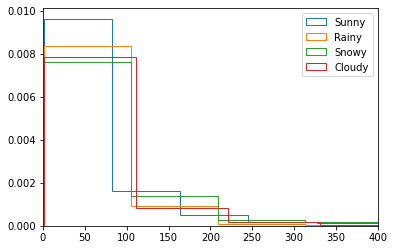

In [171]:
#make histograms
plt.hist(clear, density = True, histtype='step', bins=10)
plt.hist(rainy, density = True, histtype='step', bins=10)
plt.hist(snowy, density = True, histtype='step', bins=10)
plt.hist(cloudy, density = True, histtype='step', bins=10)
#make legend, set limits, show plot
plt.legend(('Sunny', 'Rainy', 'Snowy', 'Cloudy'))
plt.xlim(0, 400)
plt.show()

In [172]:
# comparing pairs with Welch's t-test
from scipy.stats import ttest_ind

# sunny vs. rainy
stat, p = ttest_ind(clear, rainy, equal_var=False)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably same distribution')
else:
	print('Probably not same distribution')

stat=1.222, p=0.222
Probably same distribution


In [173]:
# sunny vs. snowy
stat, p = ttest_ind(clear, snowy, equal_var=False)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably same distribution')
else:
	print('Probably not same distribution')

stat=0.007, p=0.994
Probably same distribution


In [174]:
# sunny vs. cloudy
stat, p = ttest_ind(clear, cloudy, equal_var=False)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably same distribution')
else:
	print('Probably not same distribution')

stat=0.585, p=0.558
Probably same distribution


In [175]:
# cloudy vs. rainy
stat, p = ttest_ind(cloudy, rainy, equal_var=False)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably same distribution')
else:
	print('Probably not same distribution')

stat=0.606, p=0.545
Probably same distribution


In [176]:
# cloudy vs. snowy
stat, p = ttest_ind(cloudy, snowy, equal_var=False)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably same distribution')
else:
	print('Probably not same distribution')

stat=-0.361, p=0.719
Probably same distribution


In [177]:
# snowy vs. rainy
stat, p = ttest_ind(snowy, rainy, equal_var=False)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably same distribution')
else:
	print('Probably not same distribution')

stat=0.781, p=0.435
Probably same distribution


#### What can be seen here?

As we can view in both the histogram and the subsequent Welch's t-tests it is likely that these weather patterns have similar distributions and therefore unlikely that any one weather type accounts for a higher proportion of delays.

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [124]:
# checking taxi times/time of day
taxi_times = flights[['crs_dep_time','taxi_out','crs_arr_time','taxi_in']]
taxi_times.describe()

,crs_dep_time,taxi_out,crs_arr_time,taxi_in
count,165072.000000,162480.000000,165072.000000,162379.000000
mean,1329.662214,17.548474,1484.845201,7.692041
std,489.985216,10.093291,516.774018,6.132868
min,1.000000,1.000000,1.000000,0.000000
25%,915.000000,11.000000,1100.000000,4.000000
50%,1320.000000,15.000000,1513.000000,6.000000
75%,1735.000000,20.000000,1917.000000,9.000000
max,2359.000000,163.000000,2400.000000,183.000000


In [133]:
# narrowing to view arr/dep times where taxi time above/below median
# setting cols used
cols_out = ['crs_dep_time','taxi_out']
cols_in = ['crs_arr_time','taxi_in']
# setting filters
f_out = (taxi_times['taxi_out'] > 15)
f_in = (taxi_times['taxi_in'] > 6)

# checking dep times assoc with higher taxi times
times_out = flights[cols_out][f_out].groupby('crs_dep_time').count().sort_values(
    by=['taxi_out'], ascending=False).reset_index()
times_out.head(20)

,crs_dep_time,taxi_out
0,600,1550
1,700,1102
2,800,669
3,830,596
4,1000,573
5,900,555
6,1200,448
7,1700,410
8,1400,408
9,1800,404


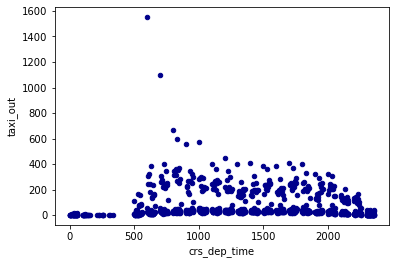

In [134]:
ax1 = times_out.plot.scatter(x='crs_dep_time',
                      y='taxi_out',
                      c='DarkBlue')

In [135]:
# checking arr times assoc with higher taxi times
times_in = flights[cols_in][f_in].groupby('crs_arr_time').count().sort_values(
    by=['taxi_in'], ascending=False).reset_index()
times_in.head(20)

,crs_arr_time,taxi_in
0,1900,218
1,900,218
2,2030,211
3,2115,198
4,1940,195
5,1710,194
6,2100,189
7,1130,187
8,1700,179
9,1450,176


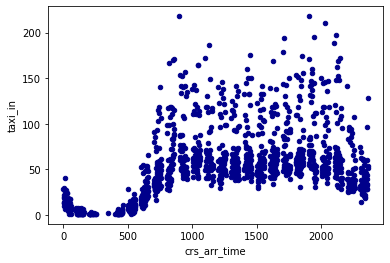

In [136]:
ax2 = times_in.plot.scatter(x='crs_arr_time',
                      y='taxi_in',
                      c='DarkBlue')

#### What do we see here?

**For departure times:**
- Can see that of the top 20 highest occuring times with longer taxi times (above average of 15mins) occur mainly in the morning (6AM - 12PM)
- 6AM - 10AM bracket accounts for most of these instances
- Next highest bracket is 1PM - 6M

**For arrival times:**
- Can see that of the top 20 highest occuring times with longer taxi times (above average of 6mins) occur mainly in the evening (1PM - 10PM)
- 5PM - 10PM bracket accounts for most higher frequencies
- Earlier bracket consists mainly of 8AM - 11AM

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [140]:
# viewing flights having departure delays
dep_delays = flights[['dep_delay','arr_delay']][flights['dep_delay'] > 0]
dep_delays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55309 entries, 1 to 165071
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dep_delay  55309 non-null  float64
 1   arr_delay  54986 non-null  float64
dtypes: float64(2)
memory usage: 1.3 MB


In [141]:
# removing null rows
dep_delays = dep_delays.dropna()
dep_delays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54986 entries, 1 to 165071
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dep_delay  54986 non-null  float64
 1   arr_delay  54986 non-null  float64
dtypes: float64(2)
memory usage: 1.3 MB


In [157]:
# filtering for flights where arrival delay > 0
dep_effect = dep_delays[dep_delays['arr_delay'] > 0]
dep_effect

,dep_delay,arr_delay
1,3.0,1.0
2,28.0,18.0
3,12.0,32.0
8,21.0,3.0
12,51.0,28.0
...,...,...
165054,19.0,3.0
165057,213.0,199.0
165059,171.0,154.0
165065,16.0,20.0


In [195]:
# comparing amount of departure delays that also had arrival delays
# vs. overall arrival delays
dep_cause = len(dep_effect)
overall = len(flights['arr_delay'][flights['arr_delay']>0])
pct_overall = round((dep_cause / overall)*100, 2)
print(f'Departure delays account for {pct_overall}% of arrival delays.')

Departure delays account for 70.98% of arrival delays.


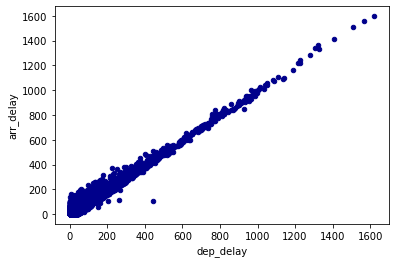

In [192]:
# plotting relationship between departure and arrival delays
ax3 = dep_effect.plot.scatter(x='dep_delay',
                      y='arr_delay',
                      c='DarkBlue')

In [179]:
# viewing difference in arrival delay vs departure delay
dep_delays['difference'] = dep_delays['dep_delay'] - dep_delays['arr_delay']
dep_delays.head()

,dep_delay,arr_delay,difference
1,3.0,1.0,2.0
2,28.0,18.0,10.0
3,12.0,32.0,-20.0
8,21.0,3.0,18.0
12,51.0,28.0,23.0


In [187]:
# count of flights where delay decreased
decr = len(dep_delays[dep_delays['difference'] > 0])
decr

38858

In [188]:
# count of flights where delay increased
incr = len(dep_delays[dep_delays['difference'] < 0])
incr

14698

In [193]:
# counts for no change, and total
no_change = len(dep_delays[dep_delays['difference'] == 0])
total = len(dep_delays)

# ratio of flights where delay changed
pct = round((decr / total)*100, 2)
pct1 = round((incr / total)*100, 2)
pct2 = round((no_change/total)*100, 2)
print(f'Delay decreased:{pct}% \nDelay increased:{pct1}% \nNo change:{pct2}%')

Delay decreased:70.67% 
Delay increased:26.73% 
No change:2.6%


#### What can be observed?

- **Overall arrival delays attributed to departure delays:** 70.98% of all arrival delays are linked to departure delays.

- **Correlation:** As seen in the scatter plot, there is a strong positive correlation between departure delays and arrival delays.

- **Impact:** Despite the high frequency of departure delays causing arrival delays, a large percentage (70.67%) of these flights are able to recoup some of this time over the course of the flight. We can see that, of the remaining flights, 26.73% have that delay compound into a higher arrival delay. Only a small percentage maintain the same delay upon arrival.

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?